# LEAD SCORE CASE STUDY

## PROBLEM STATEMENT
An X Education is seeking assistance in identifying the most promising leads, meaning those that are most likely to become paying customers. The company has asked us to create a model that assigns a lead score to each lead, ensuring that those with higher scores have a greater chance of conversion, while those with lower scores have a reduced chance. Specifically, the CEO has provided an estimate for the target lead conversion rate, aiming for around 80%. <br>
## GOALS AND OBJECTIVES
This case study has several objectives.
- Create a logistic regression model to assign a lead score ranging from 0 to 100 for each lead, which the company can utilize to focus on potential candidates. A higher score indicates that the lead is hot, meaning it is more likely to convert, while a lower score suggests that the lead is cold and unlikely to convert.
- The company has additional challenges that your model should adapt to if their needs evolve in the future, so be prepared to address these as well. These challenges are included in a separate document. Please complete this based on the logistic regression model you developed initially. Additionally, ensure that you incorporate this into your final presentation where you'll provide recommendations.

In [105]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: DATA READING AND CLEANING


In [107]:
# Importing the data with Pandas
data = pd.read_csv('Leads.csv')
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## EXAMINE THE DATAFRAME.
This provides a clear understanding of the dataframes.

In [109]:
# The .info() function provides nearly all the information required for inspection, so let’s begin with it.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [110]:
#To visualize the table, we can use the .head() or .tail() functions.
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [111]:
# The .shape function indicates the number of rows and columns.
data.shape

(9240, 37)

In [112]:
#To understand the numerical data, utilize .describe()
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## CLEANING THE DATAFRAME

In [114]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [115]:
# Replacing 'Select' with NaN (as it indicates that no option has been chosen)
data = data.replace('select',np.nan)

In [116]:
# Verifying if any columns contain only a single unique value, as this will not impact our analysis.
data.nunique()

prospect_id                                      9240
lead_number                                      9240
lead_origin                                         5
lead_source                                        21
do_not_email                                        2
do_not_call                                         2
converted                                           2
totalvisits                                        41
total_time_spent_on_website                      1731
page_views_per_visit                              114
last_activity                                      17
country                                            38
specialization                                     19
how_did_you_hear_about_x_education                 10
what_is_your_current_occupation                     6
what_matters_most_to_you_in_choosing_a_course       3
search                                              2
magazine                                            1
newspaper_article           

In [117]:
# Dropping unique valued columns
data_1= data.drop(['magazine','receive_more_updates_about_our_courses','i_agree_to_pay_the_amount_through_cheque','get_updates_on_dm_content','update_me_on_supply_chain_content'],axis=1)

In [118]:
# Assessing the proportion of missing values
round(100*(data_1.isnull().sum()/len(data_1.index)), 2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   15.56
how_did_you_hear_about_x_education               23.89
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
newspaper_article                                 0.00
x_educatio

In [119]:
# Eliminating all columns that are unnecessary and contain 35% or more null values.
data_2 = data_1.drop(['asymmetrique_profile_index','asymmetrique_activity_index','asymmetrique_activity_score','asymmetrique_profile_score','lead_profile','tags','lead_quality','how_did_you_hear_about_x_education','city','lead_number'],axis=1)
data_2.head()

,prospect_id,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,...,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [120]:
# Reviewing the percentage of missing values
round(100*(data_2.isnull().sum()/len(data_2.index)), 2)

prospect_id                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   15.56
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
newspaper_article                                 0.00
x_education_forums                                0.00
newspaper                                         0.00
digital_ad

___OBSERVATION: We have a significant number of null values across four columns, as shown above. Eliminating the rows containing these null values would lead to a substantial loss of important data. Therefore, we will substitute the NaN values with 'not provided.' This approach allows us to retain all the data with minimal null entries. If these values appear in the model later, they will be irrelevant, and we can remove them at that time.___

In [122]:
data_2['specialization'] = data_2['specialization'].fillna('not provided') 
data_2['what_matters_most_to_you_in_choosing_a_course'] = data_2['what_matters_most_to_you_in_choosing_a_course'].fillna('not provided')
data_2['country'] = data_2['country'].fillna('not provided')
data_2['what_is_your_current_occupation'] = data_2['what_is_your_current_occupation'].fillna('not provided')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   prospect_id                                    9240 non-null   object 
 1   lead_origin                                    9240 non-null   object 
 2   lead_source                                    9204 non-null   object 
 3   do_not_email                                   9240 non-null   object 
 4   do_not_call                                    9240 non-null   object 
 5   converted                                      9240 non-null   int64  
 6   totalvisits                                    9103 non-null   float64
 7   total_time_spent_on_website                    9240 non-null   int64  
 8   page_views_per_visit                           9103 non-null   float64
 9   last_activity                                  9137 

In [123]:
# Rechecking the percentage of missing values
round(100*(data_2.isnull().sum()/len(data_2.index)), 2)

prospect_id                                      0.00
lead_origin                                      0.00
lead_source                                      0.39
do_not_email                                     0.00
do_not_call                                      0.00
converted                                        0.00
totalvisits                                      1.48
total_time_spent_on_website                      0.00
page_views_per_visit                             1.48
last_activity                                    1.11
country                                          0.00
specialization                                   0.00
what_is_your_current_occupation                  0.00
what_matters_most_to_you_in_choosing_a_course    0.00
search                                           0.00
newspaper_article                                0.00
x_education_forums                               0.00
newspaper                                        0.00
digital_advertisement       

In [124]:
data_2["country"].value_counts()

country
India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [125]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

data_2['country'] = data_2.apply(lambda x:slots(x['country']), axis = 1)
data_2['country'].value_counts()

country
outside india    6779
not provided     2461
Name: count, dtype: int64

In [126]:
# Verifying the proportion of missing values
round(100*(data_2.isnull().sum()/len(data_2.index)), 2)

prospect_id                                      0.00
lead_origin                                      0.00
lead_source                                      0.39
do_not_email                                     0.00
do_not_call                                      0.00
converted                                        0.00
totalvisits                                      1.48
total_time_spent_on_website                      0.00
page_views_per_visit                             1.48
last_activity                                    1.11
country                                          0.00
specialization                                   0.00
what_is_your_current_occupation                  0.00
what_matters_most_to_you_in_choosing_a_course    0.00
search                                           0.00
newspaper_article                                0.00
x_education_forums                               0.00
newspaper                                        0.00
digital_advertisement       

In [127]:
# Evaluating the percentage of loss when the null values are excluded.
round(100*(sum(data_2.isnull().sum(axis=1) > 1)/data_2.shape[0]),2)

1.48

In [128]:
data_3 = data_2[data_2.isnull().sum(axis=1) <1]

In [129]:
# Code to calculate the percentage of rows remaining.
round(100*(data_3.shape[0])/(data.shape[0]),2)

98.2

In [130]:
# Verifying the percentage of missing values
round(100*(data_3.isnull().sum()/len(data_3.index)), 2)

prospect_id                                      0.0
lead_origin                                      0.0
lead_source                                      0.0
do_not_email                                     0.0
do_not_call                                      0.0
converted                                        0.0
totalvisits                                      0.0
total_time_spent_on_website                      0.0
page_views_per_visit                             0.0
last_activity                                    0.0
country                                          0.0
specialization                                   0.0
what_is_your_current_occupation                  0.0
what_matters_most_to_you_in_choosing_a_course    0.0
search                                           0.0
newspaper_article                                0.0
x_education_forums                               0.0
newspaper                                        0.0
digital_advertisement                         

In [131]:
# To get acquainted with all the categorical values.
for column in data_3:
    print(data_3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

prospect_id
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
lead_origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
lead_source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443


In [132]:
# Eliminating ID values because they are distinct for each individual.
data_final = data_3.drop('prospect_id',axis=1)
data_final.shape

(9074, 21)

## STEP:2 EXPLORATORY DATA ANALYSIS

###  UNIVARIATE ANALYSIS

####  CATEGORICAL VARIABLES

In [136]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    9074 non-null   object 
 1   lead_source                                    9074 non-null   object 
 2   do_not_email                                   9074 non-null   object 
 3   do_not_call                                    9074 non-null   object 
 4   converted                                      9074 non-null   int64  
 5   totalvisits                                    9074 non-null   float64
 6   total_time_spent_on_website                    9074 non-null   int64  
 7   page_views_per_visit                           9074 non-null   float64
 8   last_activity                                  9074 non-null   object 
 9   country                                        9074 non-n

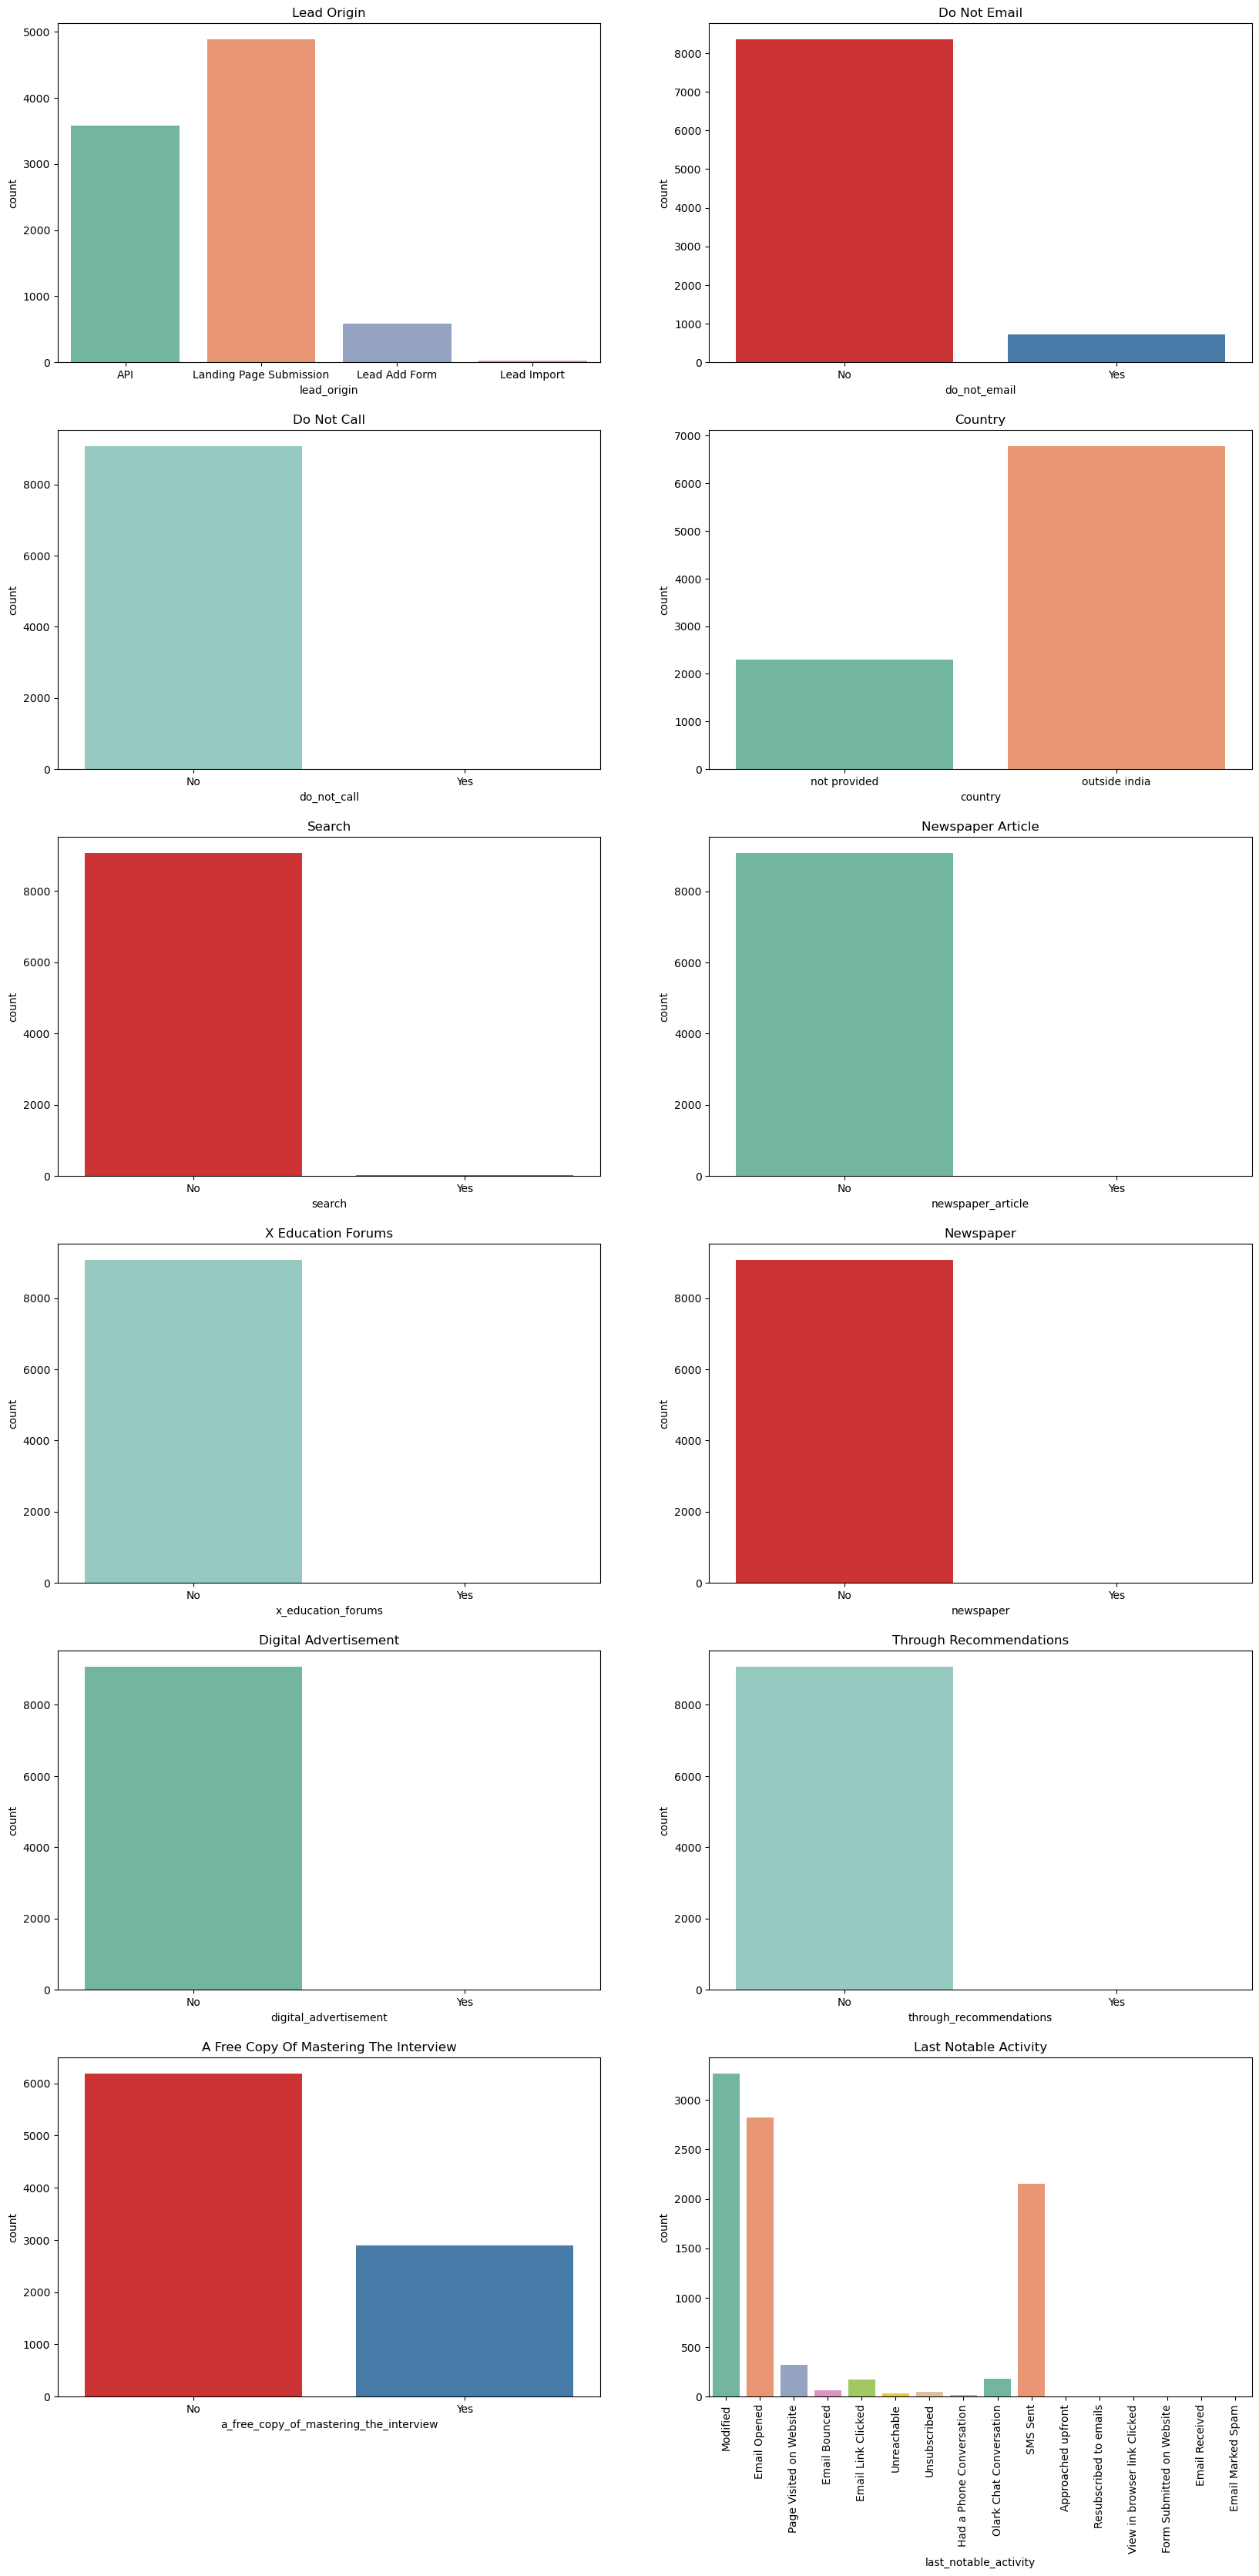

In [137]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x='lead_origin', data = data_final, palette='Set2')
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='do_not_email', data = data_final, palette='Set1')
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x='do_not_call', data = data_final, palette='Set3')
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x='country', data = data_final, palette='Set2')
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(x='search', data = data_final, palette='Set1')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(x='newspaper_article', data = data_final, palette='Set2')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x='x_education_forums', data = data_final, palette='Set3')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x='newspaper', data = data_final, palette='Set1')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(x='digital_advertisement', data = data_final, palette='Set2')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x='through_recommendations', data = data_final, palette='Set3')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x='a_free_copy_of_mastering_the_interview', data = data_final, palette='Set1')
plt.title('A Free Copy Of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(x='last_notable_activity', data = data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

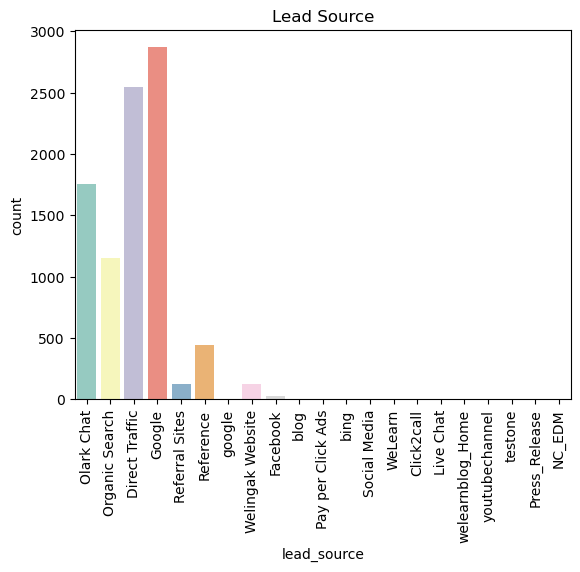

In [400]:
sns.countplot(x='lead_source', data = data_final, palette='Set3').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

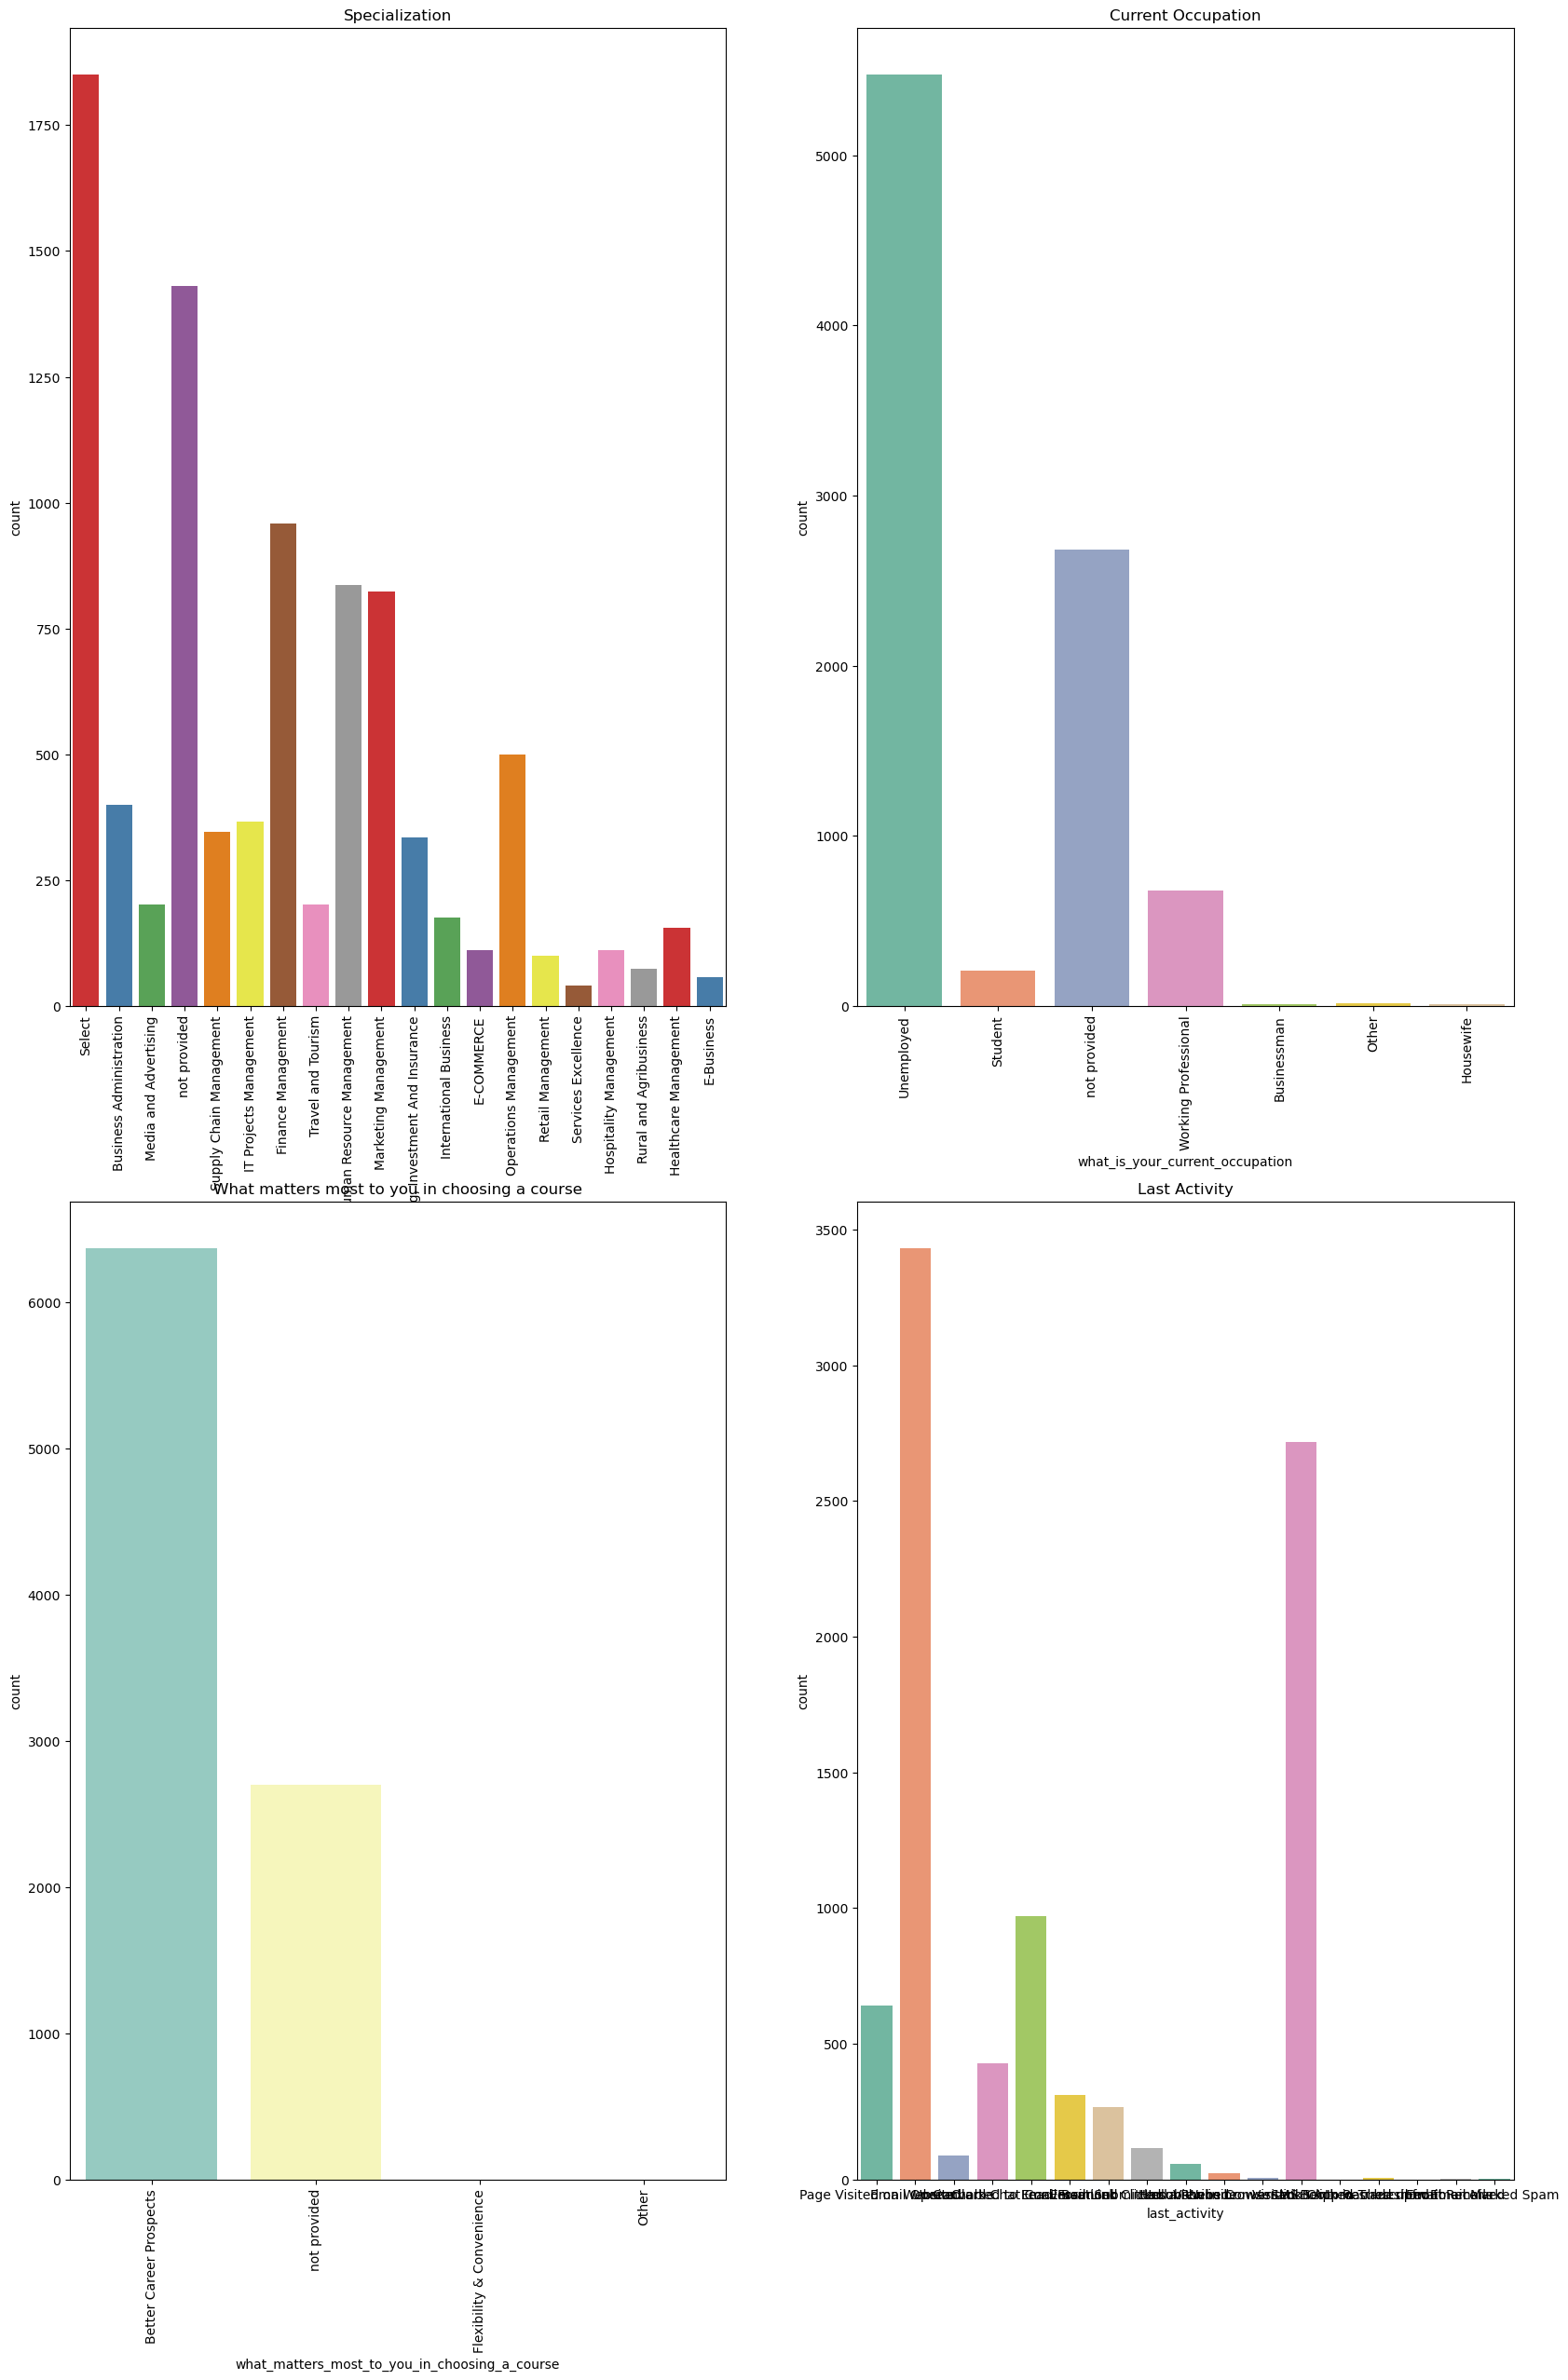

In [139]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(x='specialization', data = data_final, palette='Set1').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(x='what_is_your_current_occupation', data = data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(x='what_matters_most_to_you_in_choosing_a_course', data = data_final, palette='Set3').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(x='last_activity', data = data_final, palette='Set2').tick_params(axis='x')
plt.title('Last Activity')
plt.show()

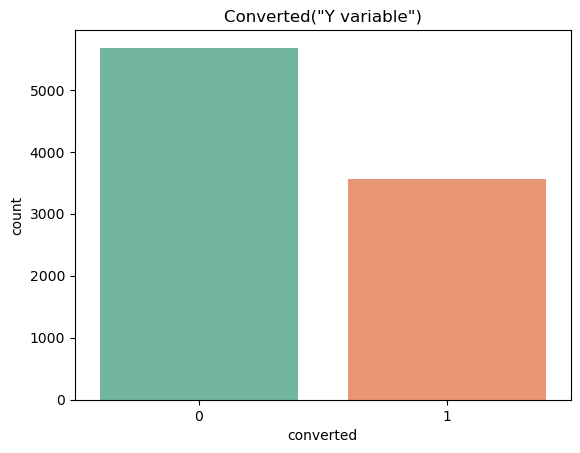

In [140]:
sns.countplot(x='converted', data = data, palette='Set2')
plt.title('Converted("Y variable")')
plt.show()

####  NUMERICAL VARIABLES

In [142]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    9074 non-null   object 
 1   lead_source                                    9074 non-null   object 
 2   do_not_email                                   9074 non-null   object 
 3   do_not_call                                    9074 non-null   object 
 4   converted                                      9074 non-null   int64  
 5   totalvisits                                    9074 non-null   float64
 6   total_time_spent_on_website                    9074 non-null   int64  
 7   page_views_per_visit                           9074 non-null   float64
 8   last_activity                                  9074 non-null   object 
 9   country                                        9074 non-n

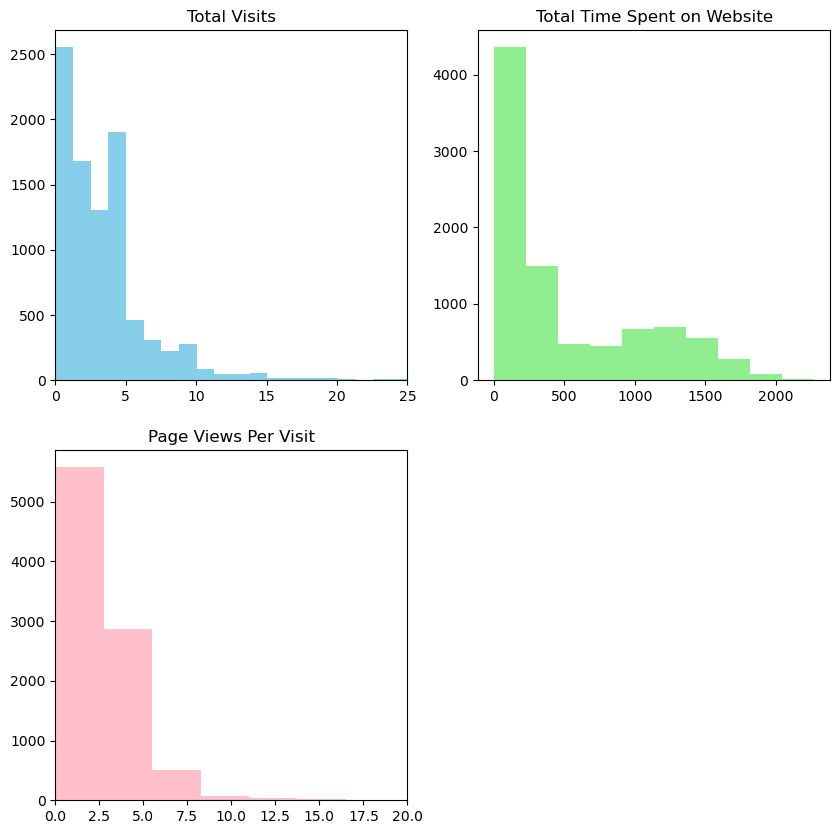

In [143]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(data_final['totalvisits'], bins = 200,color='skyblue')
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data_final['total_time_spent_on_website'], bins = 10, color='lightgreen')
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data_final['page_views_per_visit'], bins = 20, color='pink')
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

###  LINKING ALL THE CATEGORICAL VARIABLES TO CONVERTED 

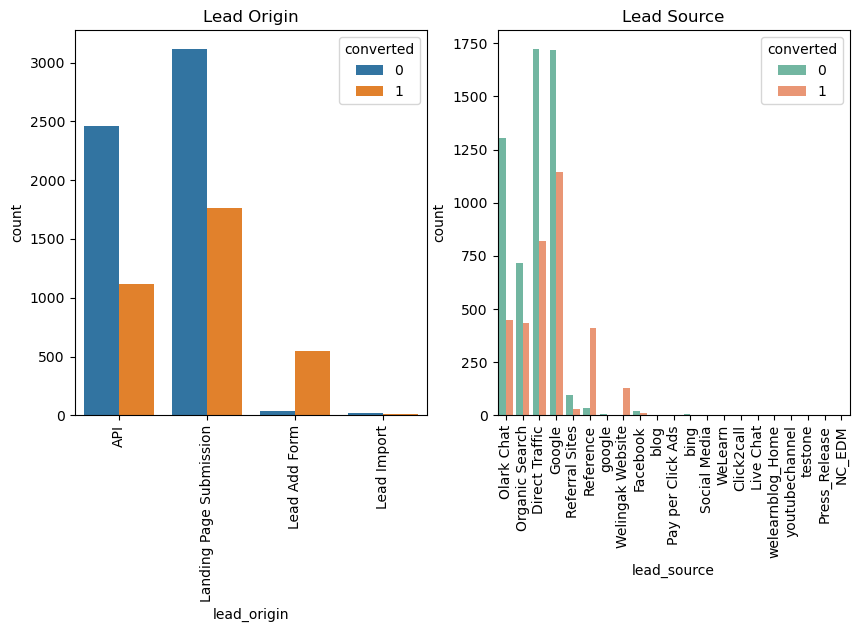

In [145]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='lead_origin', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='lead_source', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

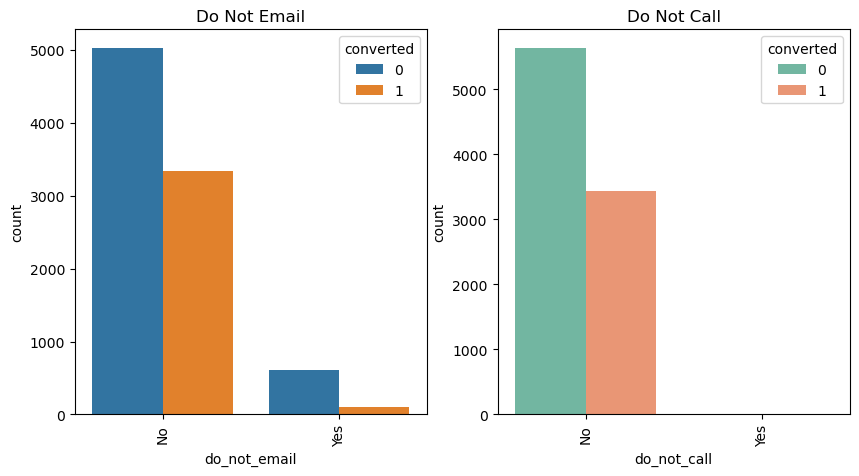

In [146]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='do_not_email', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='do_not_call', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

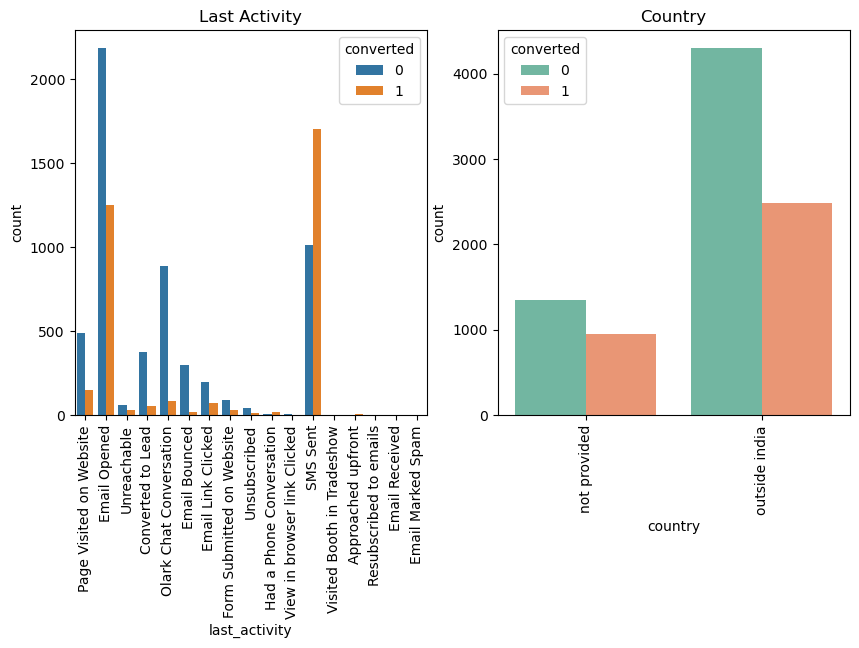

In [147]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='last_activity', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='country', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

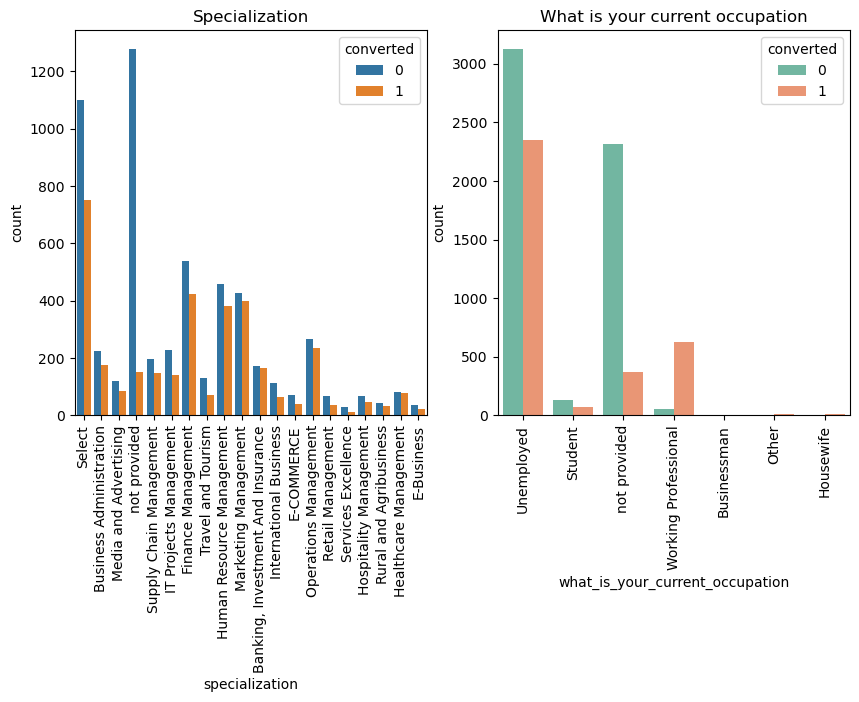

In [148]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='specialization', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='what_is_your_current_occupation', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

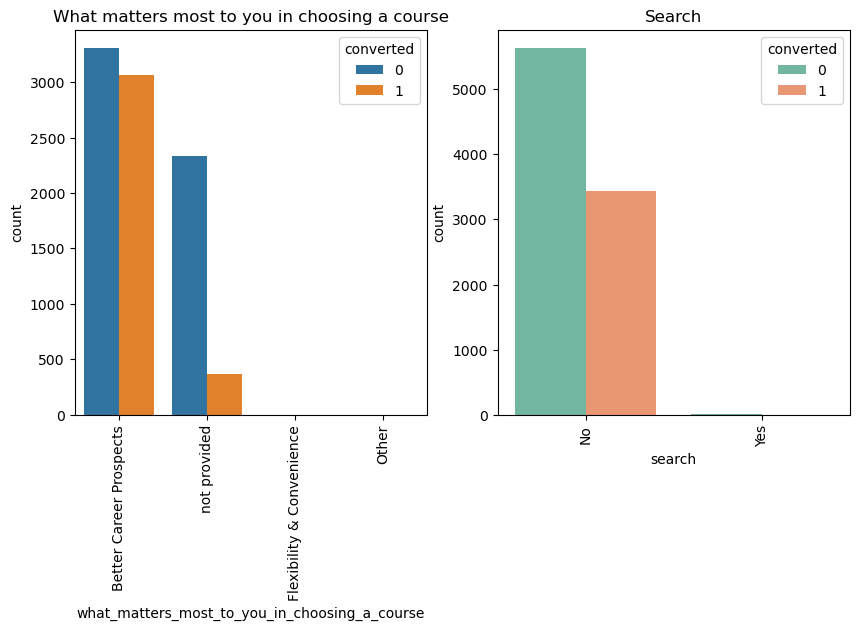

In [149]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='what_matters_most_to_you_in_choosing_a_course', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='search', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

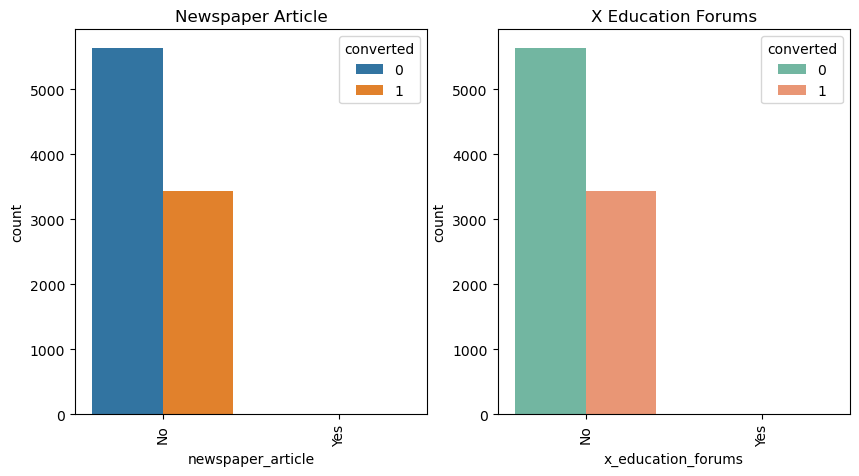

In [150]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='newspaper_article', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='x_education_forums', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

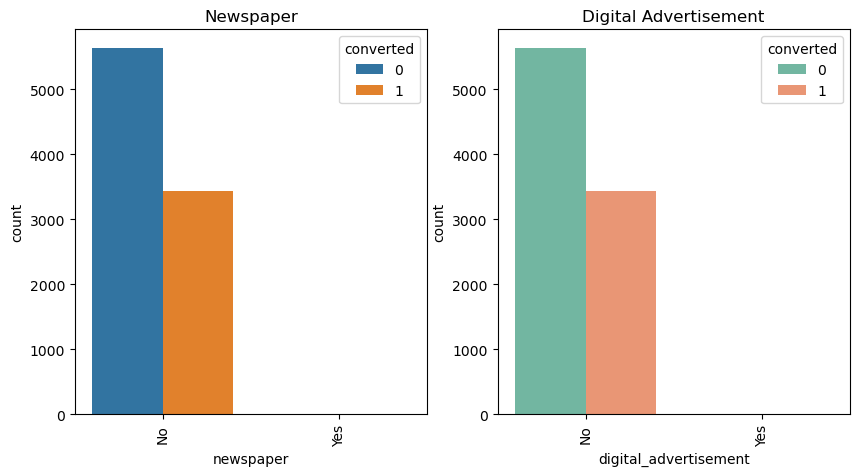

In [151]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='newspaper', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='digital_advertisement', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

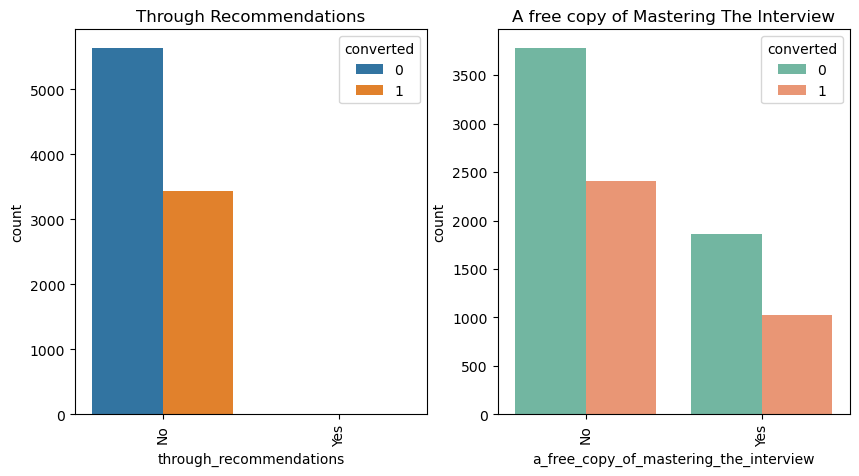

In [152]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='through_recommendations', hue='converted', data= data_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='a_free_copy_of_mastering_the_interview', hue='converted', data= data_final, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

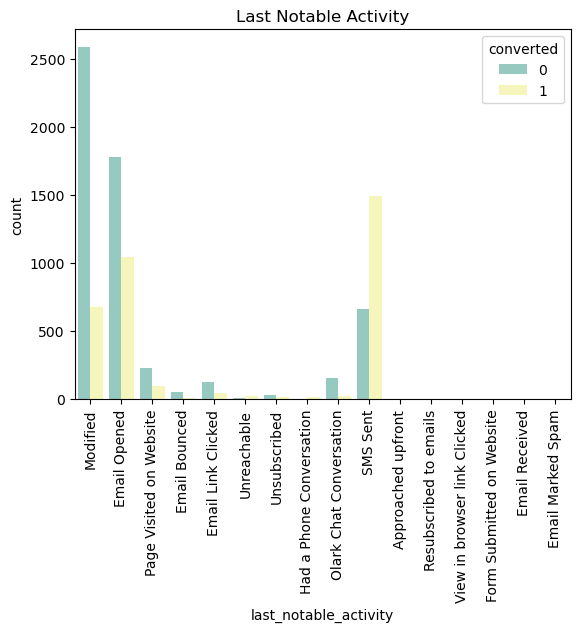

In [153]:
sns.countplot(x='last_notable_activity', hue='converted', data= data_final, palette='Set3').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

___OBSERVATION: Based on the preceding exploratory data analysis, it's clear that there are several factors with minimal data, making them less significant to our evaluation.___

In [155]:
numeric = data_final[['totalvisits','total_time_spent_on_website','page_views_per_visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


___OBSERVATION: No significant outliers are present, so let's proceed to the analysis.___

## STEP:3 DUMMY VARIABLES 

In [158]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    9074 non-null   object 
 1   lead_source                                    9074 non-null   object 
 2   do_not_email                                   9074 non-null   object 
 3   do_not_call                                    9074 non-null   object 
 4   converted                                      9074 non-null   int64  
 5   totalvisits                                    9074 non-null   float64
 6   total_time_spent_on_website                    9074 non-null   int64  
 7   page_views_per_visit                           9074 non-null   float64
 8   last_activity                                  9074 non-null   object 
 9   country                                        9074 non-n

In [159]:
data_final.loc[:, data_final.dtypes == 'object'].columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [160]:
# Generate dummy variables using the 'get_dummies'
dummy = pd.get_dummies(data_final[['lead_origin','specialization' ,'lead_source', 'do_not_email', 'last_activity', 'what_is_your_current_occupation','a_free_copy_of_mastering_the_interview', 'last_notable_activity']], drop_first=True)
# Add the results to the main dataframe
data_final_dum = pd.concat([data_final, dummy], axis=1)
data_final_dum

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,outside india,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,outside india,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,outside india,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,outside india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,outside india,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,outside india,...,False,False,False,False,False,False,True,False,False,False
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,outside india,...,False,False,False,False,False,False,True,False,False,False


In [161]:
data_final_dum = data_final_dum.drop(['what_is_your_current_occupation_not provided','lead_origin','lead_source','do_not_email','do_not_call','last_activity','country','specialization','specialization_not provided','what_is_your_current_occupation','what_matters_most_to_you_in_choosing_a_course','search','newspaper_article','x_education_forums','newspaper','digital_advertisement','through_recommendations','a_free_copy_of_mastering_the_interview','last_notable_activity'], axis=1)
data_final_dum

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## STEP:4 TEST - TRAIN  SPLIT 

In [163]:
# Import the required library
from sklearn.model_selection import train_test_split

In [164]:
X = data_final_dum.drop(['converted'], axis=1)
X.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [165]:
# Assigning the target variable to y.
y = data_final_dum['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [166]:
# Divide the dataset into 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [167]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['totalvisits', 'page_views_per_visit', 'total_time_spent_on_website']] = scaler.fit_transform(X_train[['totalvisits', 'page_views_per_visit', 'total_time_spent_on_website']])
X_train.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


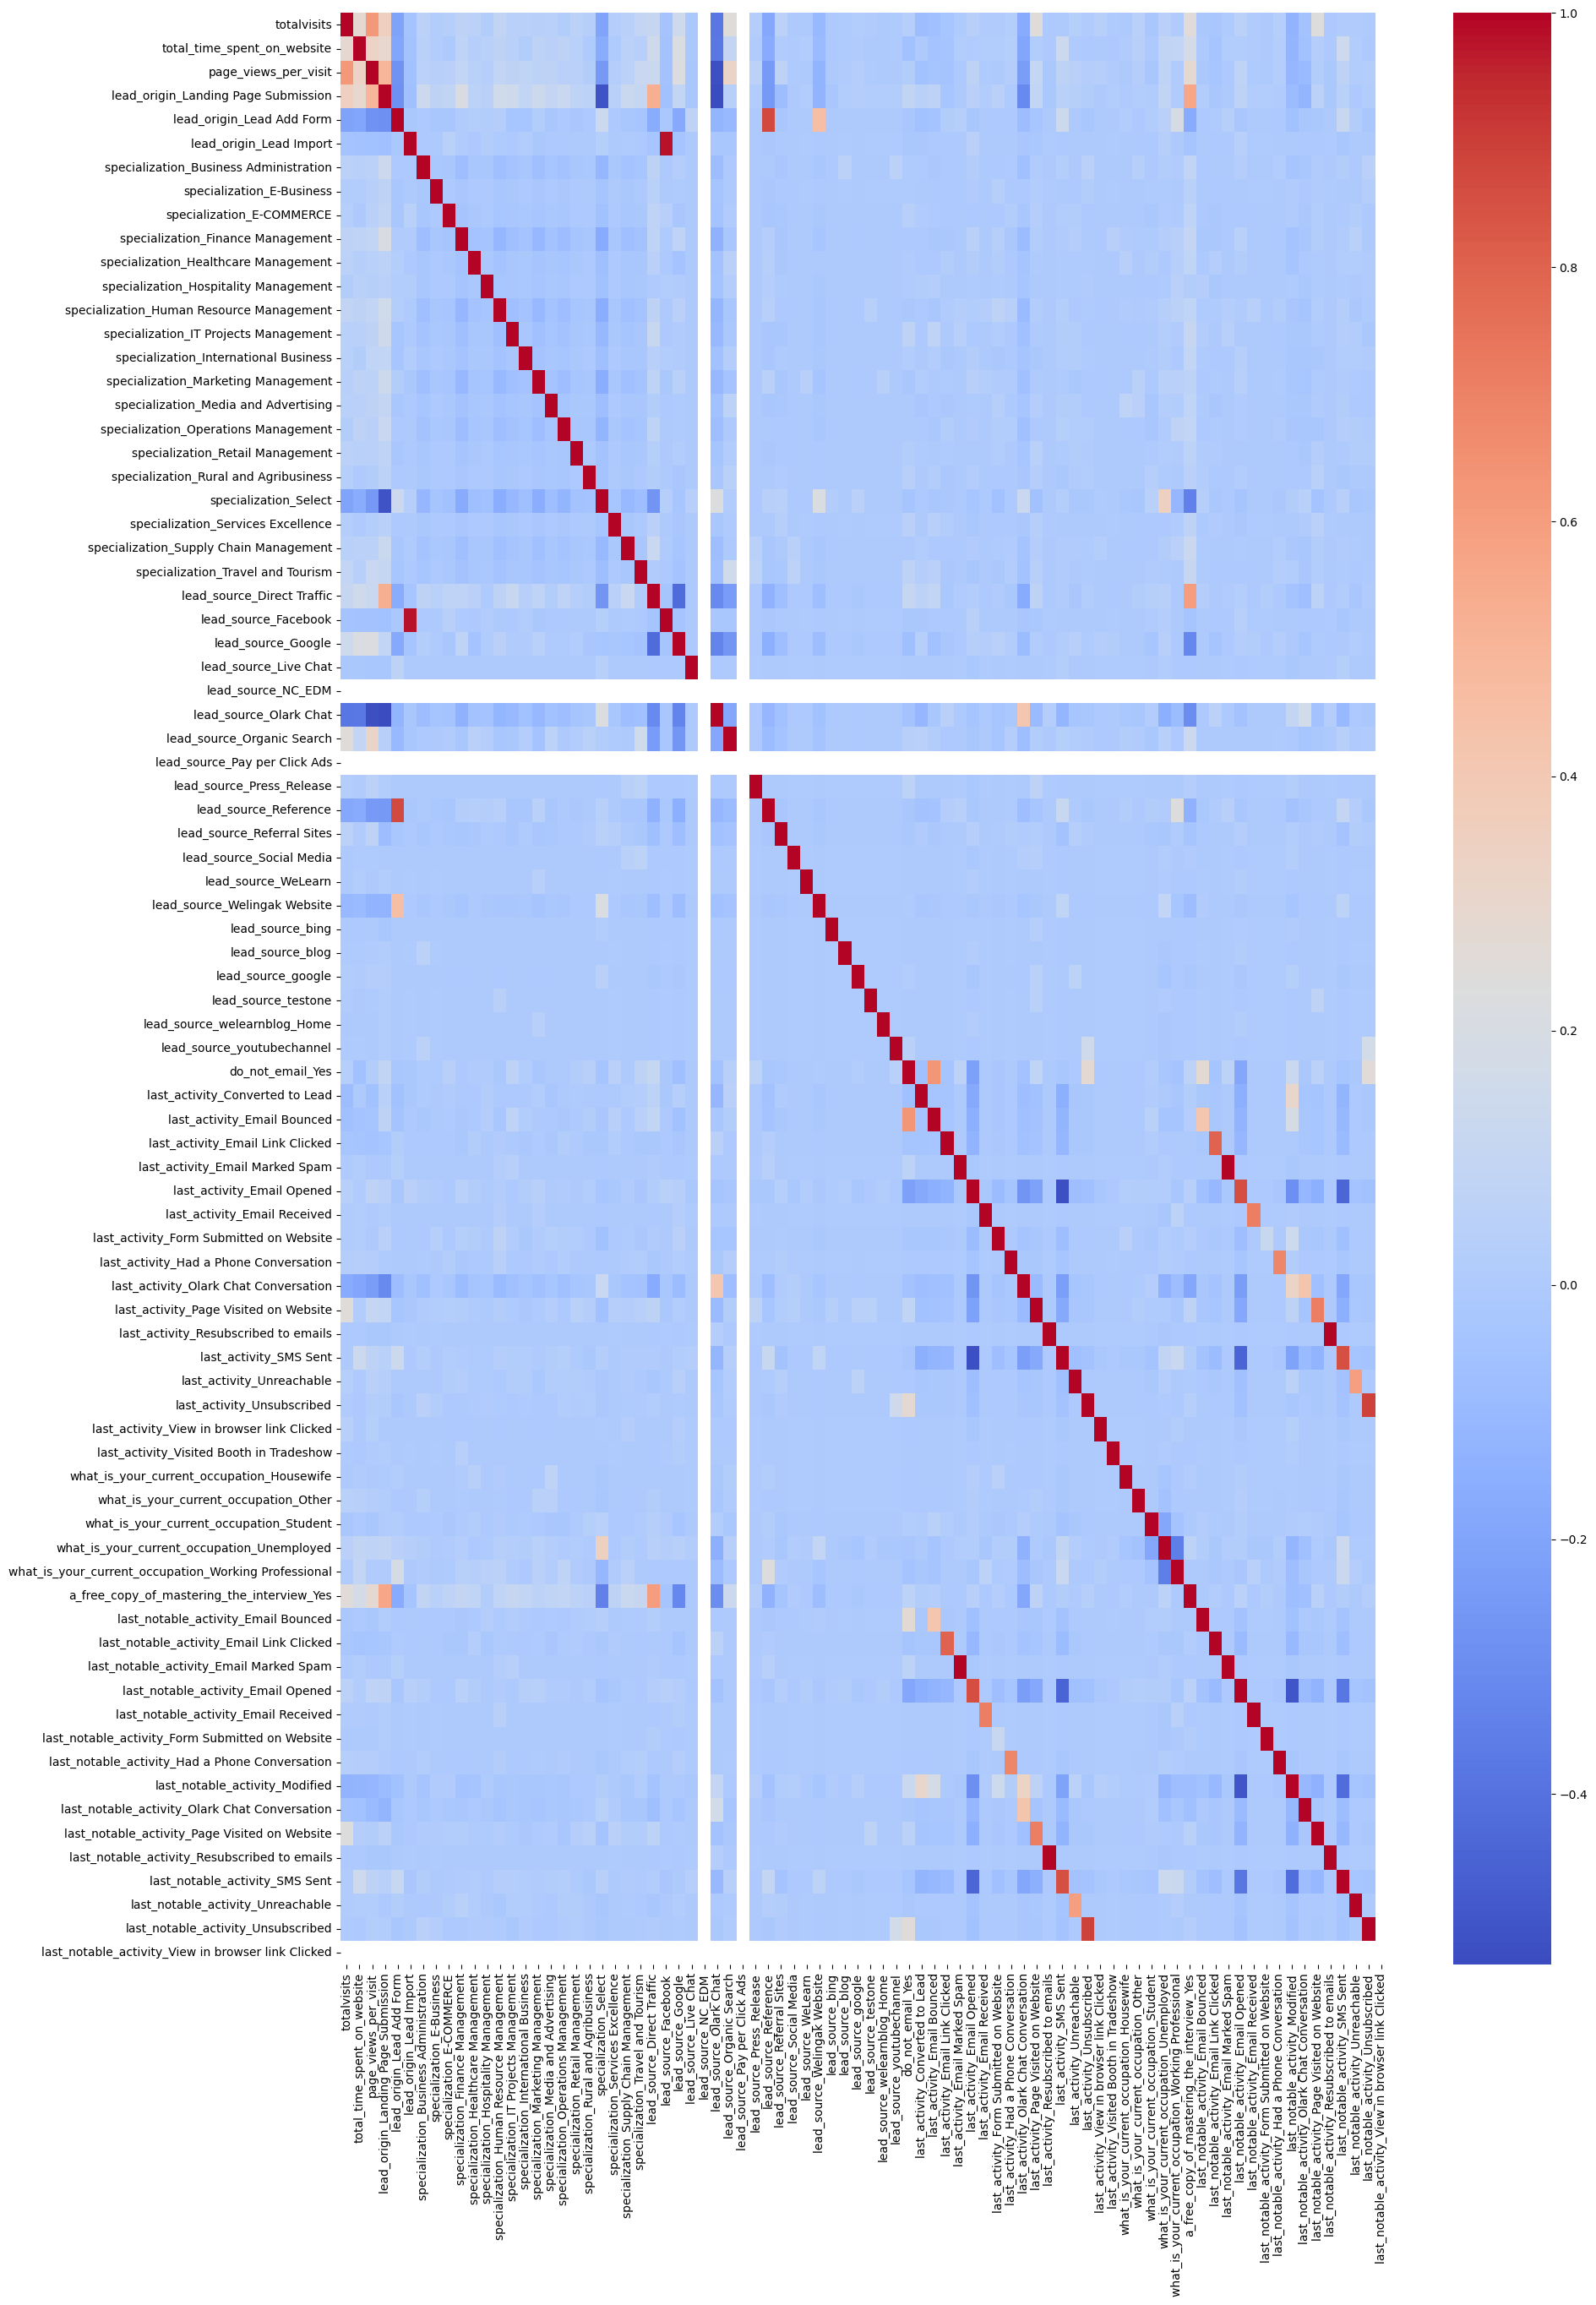

In [168]:
# To analyze the correlation between variables.
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.show()

___OBSERVATION: Given the numerous variables, it’s challenging to eliminate any. We will proceed with that after performing RFE.___

## STEP:5 MODEL BUILDING 

In [171]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [172]:
# Import RFE
from sklearn.feature_selection import RFE

In [173]:
# Executing RFE with 15 variables as output.

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [174]:
# Features that have been chosen through RFE.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('totalvisits', True, 1),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 4),
 ('lead_origin_Landing Page Submission', False, 14),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 35),
 ('specialization_Business Administration', False, 45),
 ('specialization_E-Business', False, 41),
 ('specialization_E-COMMERCE', False, 32),
 ('specialization_Finance Management', False, 43),
 ('specialization_Healthcare Management', False, 38),
 ('specialization_Hospitality Management', False, 13),
 ('specialization_Human Resource Management', False, 44),
 ('specialization_IT Projects Management', False, 40),
 ('specialization_International Business', False, 53),
 ('specialization_Marketing Management', False, 33),
 ('specialization_Media and Advertising', False, 60),
 ('specialization_Operations Management', False, 39),
 ('specialization_Retail Management', False, 22),
 ('specialization_Rural and Agribusiness', False, 34),
 ('specialization_Sele

In [175]:
# Store all the columns chosen by RFE in the variable 'col'.
col = X_train.columns[rfe.support_]

___OBSERVATION: All the variables selected by RFE, next statistics part (p-values and the VIFs).___

In [177]:
# Importing statsmodels
import statsmodels.api as sm

In [178]:
# Selecting columns selected by RFE
X_train = X_train[col]
X_train = X_train.astype(int)

In [179]:

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3123.0
Date:                Tue, 22 Oct 2024   Deviance:                       6246.0
Time:                        12:30:20   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2960
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9058      0.077    -24.847      0.000      -2.056      -1.755
totalvisits                                            -19.1313   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
total_time_spent_on_website                            -23.1399   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
lead_origin_Lead Add Form                                2.3025      0.213     10.801      0.000       1.885       2.720
lead_source_Olark Chat                                   0.1823      0.087      2.099      0.036       0.012       0.353
lead_source_Welingak Website                             2.5468      1.032      2.467      0.014       0.524       4.570
do_not_email_Yes                                        -1.5289      0.156     -9.804      0.000      -1.835      -1.223
last_activity_Olark Chat Conversation                   -1.3517      0.158     -8.546      0.000      -1.662      -1.042
last_activity_SMS Sent                                   1.3172      0.067     19.805      0.000       1.187       1.448
what_is_your_current_occupation_Housewife               24.1655   2.04e+04      0.001      0.999      -4e+04       4e+04
what_is_your_current_occupation_Other                    2.8168      0.718      3.924      0.000       1.410       4.224
what_is_your_current_occupation_Student                  1.2386      0.204      6.083      0.000       0.840       1.638
what_is_your_current_occupation_Unemployed               1.1624      0.078     14.923      0.000       1.010       1.315
what_is_your_current_occupation_Working Professional     3.7530      0.194     19.373      0.000       3.373       4.133
last_notable_activity_Had a Phone Conversation          23.0694   1.63e+04      0.001      0.999   -3.19e+04    3.19e+04
last_notable_activity_Unreachable                        1.7374      0.565      3.077      0.002       0.631       2.844
========================================================================================================================
"""

In [180]:
X_train.columns

Index(['totalvisits', 'total_time_spent_on_website',
       'lead_origin_Lead Add Form', 'lead_source_Olark Chat',
       'lead_source_Welingak Website', 'do_not_email_Yes',
       'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent',
       'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Other',
       'what_is_your_current_occupation_Student',
       'what_is_your_current_occupation_Unemployed',
       'what_is_your_current_occupation_Working Professional',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [181]:
X_train.columns = X_train.columns.str.replace(' ', '_').str.lower()
X_train.columns

Index(['totalvisits', 'total_time_spent_on_website',
       'lead_origin_lead_add_form', 'lead_source_olark_chat',
       'lead_source_welingak_website', 'do_not_email_yes',
       'last_activity_olark_chat_conversation', 'last_activity_sms_sent',
       'what_is_your_current_occupation_housewife',
       'what_is_your_current_occupation_other',
       'what_is_your_current_occupation_student',
       'what_is_your_current_occupation_unemployed',
       'what_is_your_current_occupation_working_professional',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_unreachable'],
      dtype='object')

In [182]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [183]:
# Create a VIF dataframe for every variable available.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,what_is_your_current_occupation_unemployed,1.49
2,lead_origin_lead_add_form,1.46
7,last_activity_sms_sent,1.45
3,lead_source_olark_chat,1.41
6,last_activity_olark_chat_conversation,1.35
4,lead_source_welingak_website,1.31
12,what_is_your_current_occupation_working_profes...,1.17
5,do_not_email_yes,1.05
10,what_is_your_current_occupation_student,1.02
14,last_notable_activity_unreachable,1.01


___OBSERVATION: The VIF values appear to be acceptable, but the p-values are concerning. Therefore, I will exclude 'last_notable_activity_had_a_phone_conversation'___

In [185]:
X_train.drop('last_notable_activity_had_a_phone_conversation', axis = 1, inplace = True)

In [186]:
# Refit the model using the updated features.
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3130.9
Date:                Tue, 22 Oct 2024   Deviance:                       6261.9
Time:                        12:30:21   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9023      0.077    -24.821      0.000      -2.052      -1.752
totalvisits                                            -19.1307   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
total_time_spent_on_website                            -23.1418   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
lead_origin_lead_add_form                                2.2963      0.213     10.774      0.000       1.879       2.714
lead_source_olark_chat                                   0.1822      0.087      2.100      0.036       0.012       0.352
lead_source_welingak_website                             2.5473      1.032      2.468      0.014       0.524       4.570
do_not_email_yes                                        -1.5331      0.156     -9.835      0.000      -1.839      -1.228
last_activity_olark_chat_conversation                   -1.3587      0.158     -8.592      0.000      -1.669      -1.049
last_activity_sms_sent                                   1.3097      0.066     19.707      0.000       1.179       1.440
what_is_your_current_occupation_housewife               24.1627   2.04e+04      0.001      0.999      -4e+04    4.01e+04
what_is_your_current_occupation_other                    2.8145      0.718      3.920      0.000       1.407       4.222
what_is_your_current_occupation_student                  1.2377      0.204      6.080      0.000       0.839       1.637
what_is_your_current_occupation_unemployed               1.1684      0.078     15.009      0.000       1.016       1.321
what_is_your_current_occupation_working_professional     3.7565      0.194     19.398      0.000       3.377       4.136
last_notable_activity_unreachable                        1.7301      0.565      3.063      0.002       0.623       2.837
========================================================================================================================
"""

In [187]:
# Create a VIF dataframe for every variable available.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,what_is_your_current_occupation_unemployed,1.48
2,lead_origin_lead_add_form,1.46
7,last_activity_sms_sent,1.45
3,lead_source_olark_chat,1.41
6,last_activity_olark_chat_conversation,1.35
4,lead_source_welingak_website,1.31
12,what_is_your_current_occupation_working_profes...,1.17
5,do_not_email_yes,1.05
10,what_is_your_current_occupation_student,1.02
13,last_notable_activity_unreachable,1.01


___OBSERVATION: The VIF values appear to be acceptable, but the p-values are not. Therefore, I will exclude 'what_is_your_current_occupation_housewife'___

In [189]:
X_train.drop('what_is_your_current_occupation_housewife', axis = 1, inplace = True)

In [190]:
# Refit the model using the updated features.
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3139.6
Date:                Tue, 22 Oct 2024   Deviance:                       6279.1
Time:                        12:30:22   Pearson chi2:                 6.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2924
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8798      0.076    -24.710      0.000      -2.029      -1.731
totalvisits                                            -17.1499   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
total_time_spent_on_website                            -21.1382   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
lead_origin_lead_add_form                                2.3131      0.213     10.848      0.000       1.895       2.731
lead_source_olark_chat                                   0.1757      0.087      2.029      0.043       0.006       0.345
lead_source_welingak_website                             2.5306      1.032      2.451      0.014       0.507       4.554
do_not_email_yes                                        -1.5363      0.156     -9.861      0.000      -1.842      -1.231
last_activity_olark_chat_conversation                   -1.3635      0.158     -8.628      0.000      -1.673      -1.054
last_activity_sms_sent                                   1.3029      0.066     19.634      0.000       1.173       1.433
what_is_your_current_occupation_other                    2.7929      0.718      3.890      0.000       1.386       4.200
what_is_your_current_occupation_student                  1.2176      0.203      5.985      0.000       0.819       1.616
what_is_your_current_occupation_unemployed               1.1491      0.077     14.849      0.000       0.997       1.301
what_is_your_current_occupation_working_professional     3.7362      0.193     19.313      0.000       3.357       4.115
last_notable_activity_unreachable                        1.7212      0.564      3.050      0.002       0.615       2.827
========================================================================================================================
"""

In [191]:
# Create a VIF dataframe for every variable available.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,what_is_your_current_occupation_unemployed,1.48
2,lead_origin_lead_add_form,1.46
7,last_activity_sms_sent,1.45
3,lead_source_olark_chat,1.41
6,last_activity_olark_chat_conversation,1.35
4,lead_source_welingak_website,1.31
11,what_is_your_current_occupation_working_profes...,1.17
5,do_not_email_yes,1.05
9,what_is_your_current_occupation_student,1.02
12,last_notable_activity_unreachable,1.01


___OBSERVATION: The VIF values appear to be acceptable, but the p-values are not. Therefore, I will exclude'what_is_your_current_occupation_other'___

In [193]:
X_train.drop('what_is_your_current_occupation_other', axis = 1, inplace = True)

In [194]:
# Refit the model using the updated features.
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3147.8
Date:                Tue, 22 Oct 2024   Deviance:                       6295.7
Time:                        12:30:22   Pearson chi2:                 6.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8496      0.075    -24.567      0.000      -1.997      -1.702
totalvisits                                            -17.1761   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
total_time_spent_on_website                            -21.1355   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
lead_origin_lead_add_form                                2.3113      0.213     10.841      0.000       1.893       2.729
lead_source_olark_chat                                   0.1648      0.086      1.907      0.057      -0.005       0.334
lead_source_welingak_website                             2.5312      1.032      2.452      0.014       0.508       4.554
do_not_email_yes                                        -1.5404      0.156     -9.899      0.000      -1.845      -1.235
last_activity_olark_chat_conversation                   -1.3609      0.158     -8.621      0.000      -1.670      -1.052
last_activity_sms_sent                                   1.2961      0.066     19.571      0.000       1.166       1.426
what_is_your_current_occupation_student                  1.1910      0.203      5.863      0.000       0.793       1.589
what_is_your_current_occupation_unemployed               1.1229      0.077     14.630      0.000       0.973       1.273
what_is_your_current_occupation_working_professional     3.7088      0.193     19.199      0.000       3.330       4.087
last_notable_activity_unreachable                        1.7106      0.563      3.036      0.002       0.606       2.815
========================================================================================================================
"""

In [195]:
# Create a VIF dataframe for every variable available.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,what_is_your_current_occupation_unemployed,1.48
2,lead_origin_lead_add_form,1.46
7,last_activity_sms_sent,1.45
3,lead_source_olark_chat,1.41
6,last_activity_olark_chat_conversation,1.35
4,lead_source_welingak_website,1.31
10,what_is_your_current_occupation_working_profes...,1.17
5,do_not_email_yes,1.05
8,what_is_your_current_occupation_student,1.02
11,last_notable_activity_unreachable,1.01


___OBSERVATION: The VIF values are all within an acceptable range, and all the p-values are under 0.05. Therefore, we can proceed to refine the model.___

## STEP:6 CREATING PREDICTION

In [198]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.325937
3604    0.156468
5584    0.032611
7679    0.156468
7563    0.093892
7978    0.638641
7780    0.325937
7863    0.983950
838     0.865209
708     0.325937
dtype: float64

In [199]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32593683, 0.15646841, 0.03261075, 0.15646841, 0.09389173,
       0.63864061, 0.32593683, 0.98395029, 0.86520941, 0.32593683])

In [200]:
# Data frame containing the specified conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.325937
1,0,0.156468
2,0,0.032611
3,0,0.156468
4,0,0.093892


In [201]:
# Replacing 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.325937,0
1,0,0.156468,0
2,0,0.032611,0
3,0,0.156468,0
4,0,0.093892,0


## STEP:7 MODEL EVALUATION

In [203]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [204]:
# Generating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3408,  487],
       [1083, 1373]], dtype=int64)

In [205]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [206]:
# Evaluate  overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7527948354589828

___OBSERVATION: That results in approximately 81% accuracy, which is an excellent figure.___

In [208]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [209]:
# Calculating the sensitivity
TP/(TP+FN)

0.5590390879478827

In [210]:
# Calculating the specificity
TN/(TN+FP)

0.8749679075738126

___OBSERVATION: With the existing cutoff set at 0.5, we achieve approximately 81% accuracy, a sensitivity of about 70%, and a specificity of roughly 87%.___

## OPTIMISE COTT OFF (ROC CURVE)

The earlier cutoff was chosen at random. Now, we need to determine the optimal one.

In [214]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [215]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

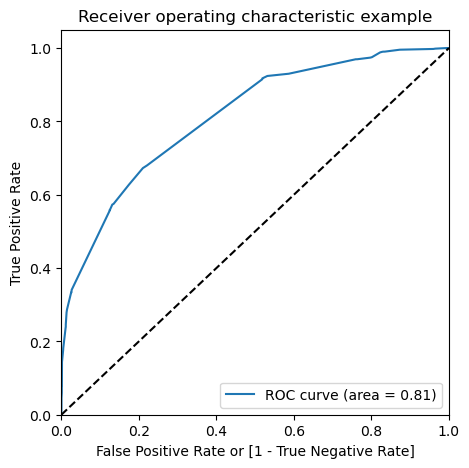

In [216]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

___OBSERVATION: The area beneath the ROC curve is 0.87, indicating a very strong performance.___

In [218]:
# Generating columns using various probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.325937,0,1,1,1,1,0,0,0,0,0,0
1,0,0.156468,0,1,1,0,0,0,0,0,0,0,0
2,0,0.032611,0,1,0,0,0,0,0,0,0,0,0
3,0,0.156468,0,1,1,0,0,0,0,0,0,0,0
4,0,0.093892,0,1,0,0,0,0,0,0,0,0,0


In [219]:
# Constructing a dataframe to examine the accuracy, sensitivity, and specificity values at various probability cutoff points.
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Creating an intricate matrix to determine the values of sensitivity, accuracy, and specificity for every probability level.
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_data

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.486223,0.990228,0.168421
0.2,0.2,0.644623,0.923860,0.468549
0.3,0.3,0.649819,0.916938,0.481386
0.4,0.4,0.754369,0.573290,0.868549
0.5,0.5,0.752795,0.559039,0.874968
0.6,0.6,0.752480,0.557410,0.875481
0.7,0.7,0.715006,0.285831,0.985623
0.8,0.8,0.713116,0.279316,0.986650
0.9,0.9,0.679421,0.178339,0.995379


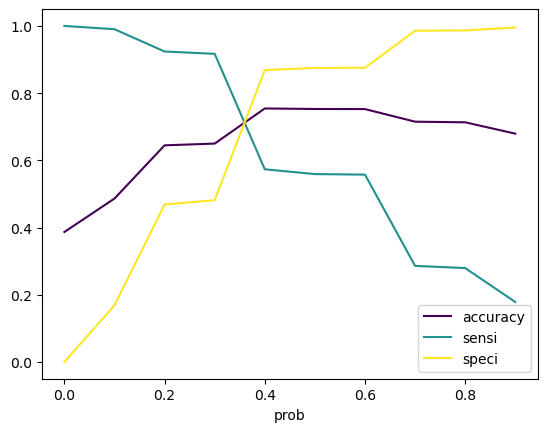

In [220]:
# Plotting it
cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'], cmap='viridis')
plt.show()

___OBSERVATION: The graph clearly shows that the ideal cutoff point is at 0.35.___

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.325937,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.156468,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.032611,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.156468,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.093892,0,1,0,0,0,0,0,0,0,0,0,0


In [223]:
# Verify the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7444496929617384

In [224]:
# Generating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3076,  819],
       [ 804, 1652]], dtype=int64)

In [225]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [226]:
# Calculating the sensitivity
TP/(TP+FN)

0.6726384364820847

In [227]:
# Calculating the specificity
TN/(TN+FP)

0.7897304236200257

___OBSERVATION: With the present cutoff set at 0.35, we achieve an accuracy, sensitivity, and specificity of approximately 80%.___

## STEP:8 PREDICTION ON TEST SET

In [230]:
# Scaling numeric values
X_test[['totalvisits', 'page_views_per_visit', 'total_time_spent_on_website']] = scaler.transform(X_test[['totalvisits', 'page_views_per_visit', 'total_time_spent_on_website']])

In [231]:
X_test.columns = X_test.columns.str.replace(' ', '_').str.lower()
X_test.columns

Index(['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin_landing_page_submission', 'lead_origin_lead_add_form',
       'lead_origin_lead_import', 'specialization_business_administration',
       'specialization_e-business', 'specialization_e-commerce',
       'specialization_finance_management',
       'specialization_healthcare_management',
       'specialization_hospitality_management',
       'specialization_human_resource_management',
       'specialization_it_projects_management',
       'specialization_international_business',
       'specialization_marketing_management',
       'specialization_media_and_advertising',
       'specialization_operations_management',
       'specialization_retail_management',
       'specialization_rural_and_agribusiness', 'specialization_select',
       'specialization_services_excellence',
       'specialization_supply_chain_management',
       'specialization_travel_and_tourism', 'lead_source_direct_traffic

In [232]:
# Substituting all the columns in the final train model
col = X_train.columns
col

Index(['totalvisits', 'total_time_spent_on_website',
       'lead_origin_lead_add_form', 'lead_source_olark_chat',
       'lead_source_welingak_website', 'do_not_email_yes',
       'last_activity_olark_chat_conversation', 'last_activity_sms_sent',
       'what_is_your_current_occupation_student',
       'what_is_your_current_occupation_unemployed',
       'what_is_your_current_occupation_working_professional',
       'last_notable_activity_unreachable'],
      dtype='object')

In [233]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,totalvisits,total_time_spent_on_website,lead_origin_lead_add_form,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_olark_chat_conversation,last_activity_sms_sent,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional,last_notable_activity_unreachable
8308,1.0,0.035461,0.416813,False,False,False,False,False,False,False,True,False,False
7212,1.0,0.028369,0.001320,False,False,False,False,False,True,False,False,True,False
2085,1.0,0.000000,0.000000,True,False,True,False,False,False,False,True,False,False
4048,1.0,0.028369,0.617077,False,False,False,False,False,True,False,True,False,False
4790,1.0,0.028369,0.005282,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,True,False,False,True,False,False,True,False,False
8179,1.0,0.170213,0.148768,False,False,False,False,False,True,False,False,False,False
6236,1.0,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False
5240,1.0,0.078014,0.458627,False,False,False,False,False,True,False,True,False,False


In [234]:
X_test_sm = X_test_sm.astype(int)

In [235]:
print(X_test_sm.dtypes)

const                                                   int32
totalvisits                                             int32
total_time_spent_on_website                             int32
lead_origin_lead_add_form                               int32
lead_source_olark_chat                                  int32
lead_source_welingak_website                            int32
do_not_email_yes                                        int32
last_activity_olark_chat_conversation                   int32
last_activity_sms_sent                                  int32
what_is_your_current_occupation_student                 int32
what_is_your_current_occupation_unemployed              int32
what_is_your_current_occupation_working_professional    int32
last_notable_activity_unreachable                       int32
dtype: object


In [236]:
# Saving the predictions for the test set in the variable 'y_test_pred'.
y_test_pred = res.predict(X_test_sm)
# Coverting it to data
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Eliminate the index from both dataframes in order to APPEND them side by side. 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,converted,Conversion_Prob
0,0,0.325937
1,1,0.959119
2,1,0.983950
3,1,0.638641
4,0,0.325937


In [237]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,converted,Conversion_Prob,final_predicted
0,0,0.325937,0
1,1,0.959119,1
2,1,0.983950,1
3,1,0.638641,1
4,0,0.325937,0
...,...,...,...
2718,1,0.127557,0
2719,0,0.365059,1
2720,0,0.156468,0
2721,1,0.638641,1


In [238]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.7543150936467132

In [239]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[1380,  364],
       [ 305,  674]], dtype=int64)

In [240]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [241]:
# Calculating the sensitivity
TP/(TP+FN)

0.6884576098059244

In [242]:
# Calculating the specificity
TN/(TN+FP)

0.7912844036697247

___OBSERVATION: With the present cutoff set at 0.35, we achieve an accuracy, sensitivity, and specificity of approximately 80%.___

## STEP:9 PRECISION-RECALL

In [245]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3408,  487],
       [1083, 1373]], dtype=int64)

In [246]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7381720430107527

In [247]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5590390879478827

___OBSERVATION: With the existing threshold set at 0.35, our Precision is approximately 78% and our Recall is around 70%.___

###  PRECISION AND RECALL TRADEOFF 

In [250]:
from sklearn.metrics import precision_recall_curve

In [251]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [252]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

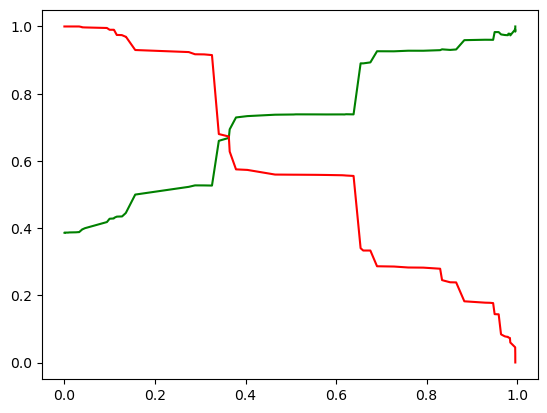

In [253]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [254]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.325937,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.156468,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.032611,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.156468,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.093892,0,1,0,0,0,0,0,0,0,0,0,0


In [255]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7526373799401669

In [256]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3406,  489],
       [1082, 1374]], dtype=int64)

In [257]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [258]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7375201288244766

In [259]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5594462540716613

___OBSERVATION: Given the current threshold of 0.41, we achieve a Precision of approximately 74% and a Recall of about 76%.___

## STEP:10 PREDICTION ON TEST SET

In [262]:
# Saving the predictions for the test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to data
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Eliminate the index from both dataframes in order to APPEND them side by side.
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,converted,Conversion_Prob
0,0,0.325937
1,1,0.959119
2,1,0.983950
3,1,0.638641
4,0,0.325937


In [263]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,converted,Conversion_Prob,final_predicted
0,0,0.325937,0
1,1,0.959119,1
2,1,0.983950,1
3,1,0.638641,1
4,0,0.325937,0
...,...,...,...
2718,1,0.127557,0
2719,0,0.365059,0
2720,0,0.156468,0
2721,1,0.638641,1


In [264]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.7778185824458318

In [265]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[1537,  207],
       [ 398,  581]], dtype=int64)

In [266]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [267]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7373096446700508

In [268]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5934627170582226

___OBSERVATION: Given the current threshold of 0.41, we have a Precision of approximately 73% and a Recall of about 75%.___

## Conclusion
The key variables influencing potential buyers are ranked as follows (in descending order):  
1.	The total duration spent on the website.  
2.	The overall number of visits.
3.	The lead source was identified as:   <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	The timing of the last activity was: <br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	The lead origin was in the Lead add format.
6.	Their current occupation falls under working professionals.  <br>
With these factors considered, X Education has a significant opportunity to persuade nearly all potential buyers to reconsider and purchase their courses.